# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

Run the next code cell to install a few packages. This line will take a few minutes to run!

In [1]:
#!pip -q install ./python

### 1. Import the Necessary Packages

We begin by importing the necessary packages.  

If the code cell below returns an error, please double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from unityagents import UnityEnvironment
import numpy as np
#from workspace_utils import active_session

### 2. Start the Environment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [4]:
# env = UnityEnvironment(file_name='/data/Tennis_Linux_NoVis/Tennis.x86_64')

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(brain_name)

TennisBrain


### 3. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]


### 4. Take Random Actions in the Environment

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

In [7]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


# Multi-Agent Deep Deterministic Policy Gradients (MADDPG)
---
We train Multi-Agent DDPG with Unity's Tennis environment.

### 5. Instantiate the Agent

Initialize the agent in the code cell below.

In [8]:
from maddpg import MADDPG as MultiAgent

multi_agent = MultiAgent(state_size=24, action_size=2, num_agents=num_agents, random_seed=2)

### 6. Examine the Models 

Run the code cell below to print some information about the actor and critic models.

In [9]:
print(multi_agent.ddpg_agents[0].actor_local)

Actor(
  (fc1): Linear(in_features=24, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
)


In [10]:
print(multi_agent.ddpg_agents[0].actor_target)

Actor(
  (fc1): Linear(in_features=24, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
)


In [11]:
print(multi_agent.ddpg_agents[0].critic_local)

Critic(
  (fcs1): Linear(in_features=24, out_features=256, bias=True)
  (fc2): Linear(in_features=258, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
)


In [12]:
print(multi_agent.ddpg_agents[0].critic_target)

Critic(
  (fcs1): Linear(in_features=24, out_features=256, bias=True)
  (fc2): Linear(in_features=258, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
)


### 7. Train the Agent with MADDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

Define the function to train the agent from scratch. 

Please note that when training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [13]:
def maddpg_training(n_episodes=3000, max_t=1000):
    """Multi-Agent Deep Deterministic Policy Gradients (DDPG).
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    solved = False
    scores_window = deque(maxlen=100)                      # last 100 averaged (over all agents) scores
    scores = []                                            # list containing scores from each episode
    average_scores = []                                    # list containing all averaged scores
    
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        states = env_info.vector_observations              # get the current state (for each agent)
        
        multi_agent.reset()                                # reset the agent
        agent_scores = np.zeros(num_agents)                # initialize the score (for each agent)
        
        for t in range(max_t):
            
            actions = multi_agent.act(states)              # select an action (for each agent)
            
            env_info = env.step(actions)[brain_name]       # send all actions to tne environment
            
            next_states = env_info.vector_observations     # get next state (for each agent)
            rewards = env_info.rewards                     # get reward (for each agent)
            dones = env_info.local_done                    # see if episode has finished
            
            multi_agent.step(states, actions, rewards, next_states, dones, t) # learn
            
            states = next_states                           # roll over the state to next time step
            agent_scores += rewards                        # update the score (for each agent)
            if np.any(dones):                              # exit loop if episode finished
                break 
                
        score = np.max(agent_scores)                       # calculate episode score as maximum of agent scores
                
        scores_window.append(score)                        # save most recent score
        scores.append(score)                               # save most recent score
        average_scores.append(np.mean(scores_window))
        print('\rEpisode {}\tAverage Score: {:.2f}\tEpisode Score: {:.2f}\tMax Score (Window): {:.2f}\tMax Score (Overall): {:.2f}\tAgents:{:.2f}\t{:.2f}'.format(i_episode, np.mean(scores_window), score, np.max(scores_window), np.max(scores), rewards[0], rewards[1]), end="")                                                                                 
        if i_episode % 1000 == 0:
            torch.save(multi_agent.ddpg_agents[0].actor_local.state_dict(), 'checkpoint_actor0.pth')
            torch.save(multi_agent.ddpg_agents[0].critic_local.state_dict(), 'checkpoint_critic0.pth')
            torch.save(multi_agent.ddpg_agents[1].actor_local.state_dict(), 'checkpoint_actor1.pth')
            torch.save(multi_agent.ddpg_agents[1].critic_local.state_dict(), 'checkpoint_critic1.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}\tEpisode Score: {:.2f}\tMax Score (Window): {:.2f}\tMax Score (Overall): {:.2f}'.format(i_episode, np.mean(scores_window), score, np.max(scores_window), np.max(scores))) 
        if np.mean(scores_window)>=0.5 and not solved:
            print('\n\nEnvironment solved in {:d} episodes!'.format(i_episode))
            print('\n')
            torch.save(multi_agent.ddpg_agents[0].actor_local.state_dict(), 'checkpoint_actor0.pth')
            torch.save(multi_agent.ddpg_agents[0].critic_local.state_dict(), 'checkpoint_critic0.pth')
            torch.save(multi_agent.ddpg_agents[1].actor_local.state_dict(), 'checkpoint_actor1.pth')
            torch.save(multi_agent.ddpg_agents[1].critic_local.state_dict(), 'checkpoint_critic1.pth')
            solved = True
            break
    return scores, average_scores


In [14]:
scores, average_scores = maddpg_training()

Episode 1000	Average Score: 0.01	Episode Score: 0.00	Max Score (Window): 0.10	Max Score (Overall): 0.20	Agents:0.00	-0.01
Episode 1729	Average Score: 0.51	Episode Score: 2.60	Max Score (Window): 2.70	Max Score (Overall): 2.70	Agents:0.00	0.001

Environment solved in 1729 episodes!




In [15]:
#with active_session():
#    # do long-running work here
#    scores = maddpg_training()

### 8.  Plot the Scores

Figure shows how the agent’s score evolves

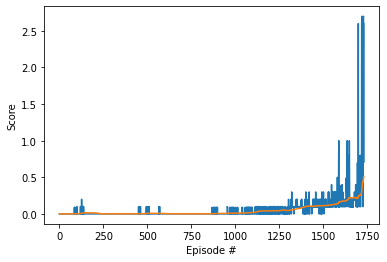

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(1, len(scores)+1), average_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


### 9. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [ ]:
# load the weights from file
multi_agent.ddpg_agents[0].actor_local.load_state_dict(torch.load('checkpoint_actor0.pth'))
multi_agent.ddpg_agents[0].critic_local.load_state_dict(torch.load('checkpoint_critic0.pth'))
multi_agent.ddpg_agents[1].actor_local.load_state_dict(torch.load('checkpoint_actor1.pth'))
multi_agent.ddpg_agents[1].critic_local.load_state_dict(torch.load('checkpoint_critic1.pth'))

for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = multi_agent.act(states)                  # select an action (for each agent)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 2.7000000402331352


### 10. Close the Environment

When finished, you can close the environment.

In [ ]:
env.close()